In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Stock/Apple.csv')
df

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


         Date       Open       High        Low      Close  Adj Close  \
0  2018-12-12  42.599998  42.980000  42.255001  42.275002  40.576008   
1  2018-12-13  42.622501  43.142502  42.387501  42.737499  41.019917   
2  2018-12-14  42.250000  42.270000  41.320000  41.369999  39.707371   
3  2018-12-17  41.362499  42.087502  40.682499  40.985001  39.337845   
4  2018-12-18  41.345001  41.882500  41.097500  41.517502  39.848946   

      Volume  
0  142510800  
1  127594400  
2  162814800  
3  177151600  
4  135366000  


In [4]:
# 2.  chia train test validate theo tỉ lệ 7:3
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']] # Biến phụ thuộc theo mảng 2 chiều



In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 1, 'gamma': 'scale'}
Best score: 19.457781082183715


In [6]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([139.5443867 , 133.94001495, 132.60806051, 136.10785615,
       131.07972135, 131.78310209, 135.82488305, 136.53189849,
       137.36832969, 140.69077735, 142.25770556, 142.18847769,
       139.45446726, 137.14683278, 137.82090079, 140.39219239,
       142.87985527, 145.26609755, 146.24229888, 145.35408127,
       147.11834142, 145.16829658, 147.60410246, 149.45470897,
       150.14110069, 149.81247604, 152.2173053 , 154.0047312 ,
       154.69186467, 153.4922956 , 151.60905955, 155.70996796,
       156.01107439, 161.9010288 , 161.8611405 , 160.68830749,
       164.87395892, 165.48152209, 164.12680881, 166.11083774,
       164.09657227, 167.66929739, 169.35548542, 170.56180411,
       171.80630588, 172.1318736 , 174.59286935, 173.33768802,
       172.16236883, 168.20031491, 167.026769  , 166.41585475,
       168.48643079, 169.41684042, 161.17448315, 160.83700803,
       158.88271204, 156.76995239, 158.66666918, 155.47702147,
       155.06971949, 154.76934955, 156.18604417, 162.53

In [7]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[193.179993]])

In [8]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([187.33300738]),
 array([184.35858278]),
 array([182.14962286]),
 array([180.28517755]),
 array([178.59647315]),
 array([176.9965357]),
 array([175.43383374]),
 array([173.87543974]),
 array([172.29999354]),
 array([170.69459594]),
 array([169.05340532]),
 array([167.37687935]),
 array([165.67105359]),
 array([163.94650184]),
 array([162.21685434]),
 array([160.49698567]),
 array([158.80116477]),
 array([157.14151141]),
 array([155.52700914]),
 array([153.96314475]),
 array([152.45207489]),
 array([150.99312995]),
 array([149.58345939]),
 array([148.21867182]),
 array([146.8933861]),
 array([145.60166224]),
 array([144.3373146]),
 array([143.09412632]),
 array([141.86598911]),
 array([140.64699164])]

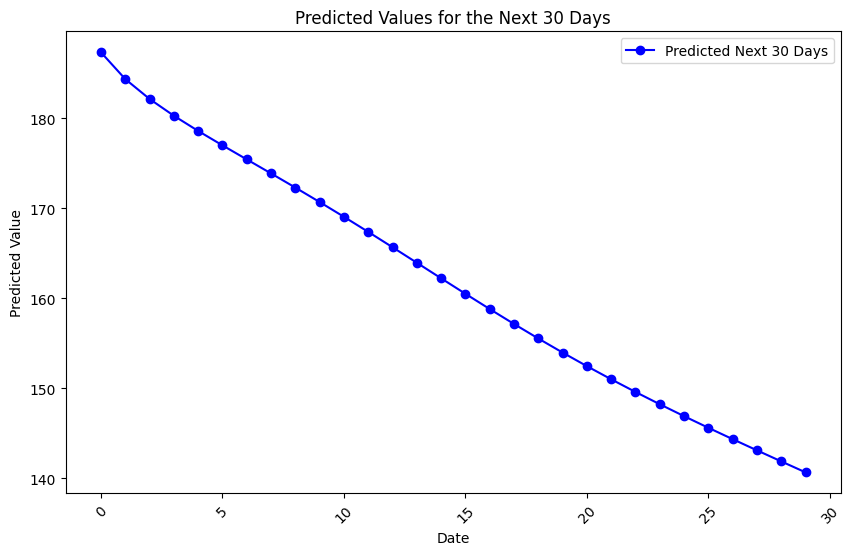

In [9]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [10]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [11]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: Close    2.226984
dtype: float64
Testing MAPE: 0.009651266629157046
Testing MAE: 1.6175177957516598


In [12]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: Close    2.226984
dtype: float64
Testing MAPE: 0.009651266629157046
Testing MAE: 1.6175177957516598


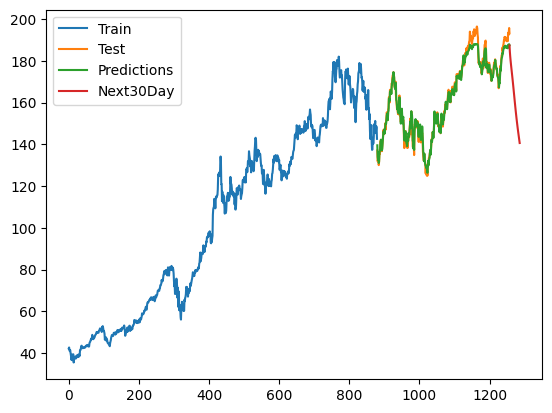

In [13]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()